<a href="https://colab.research.google.com/github/jaidvedant/BML-LCA/blob/main/exp_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


file_path = '/content/drive/MyDrive/data/heart.csv'

# Add column names from dataset
columns = [
    'age','sex','cp','trestbps','chol','fbs','restecg',
    'thalach','exang','oldpeak','slope','ca','thal','num'
]

# Load data
df = pd.read_csv(file_path, names=columns, na_values='?')
df = df.dropna()

# Use 'num' as the target column
target = df['num']
data = df.drop(columns=['num'])

In [4]:
# Data standardization
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
standardized_data = (data - mean) / std_dev

# Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Eigen Values and Eigen Vectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort Eigen Values and Select Top k
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors

array([[ 0.31420252,  0.40614872,  0.18181083,  0.54823509, -0.09407661,
        -0.0206618 , -0.14054369,  0.30715312,  0.12829615,  0.22373018,
        -0.2624772 ,  0.37900026,  0.01672242],
       [ 0.09083783, -0.37779171,  0.06093808, -0.01101603,  0.55484915,
        -0.25530873, -0.28760018, -0.0507044 , -0.05496875,  0.16250682,
        -0.17599193,  0.1989252 , -0.53561904],
       [-0.27460749,  0.29726609,  0.00635061, -0.09720829,  0.35697431,
         0.28790041,  0.59428374, -0.16317945,  0.19341117,  0.21538959,
         0.04794993,  0.35143235, -0.16435134],
       [ 0.18392019,  0.43818675,  0.0201296 , -0.25872142,  0.2038493 ,
         0.02260103, -0.06413037, -0.18813809,  0.17945982, -0.33276335,
        -0.59533383, -0.35039179, -0.07152427],
       [ 0.11737503,  0.36451402, -0.00745311, -0.18379048, -0.40782498,
        -0.34340982, -0.10887361, -0.3200667 ,  0.10472957, -0.04932936,
         0.37238051,  0.1539752 , -0.49516986],
       [ 0.07363999,  0.317433

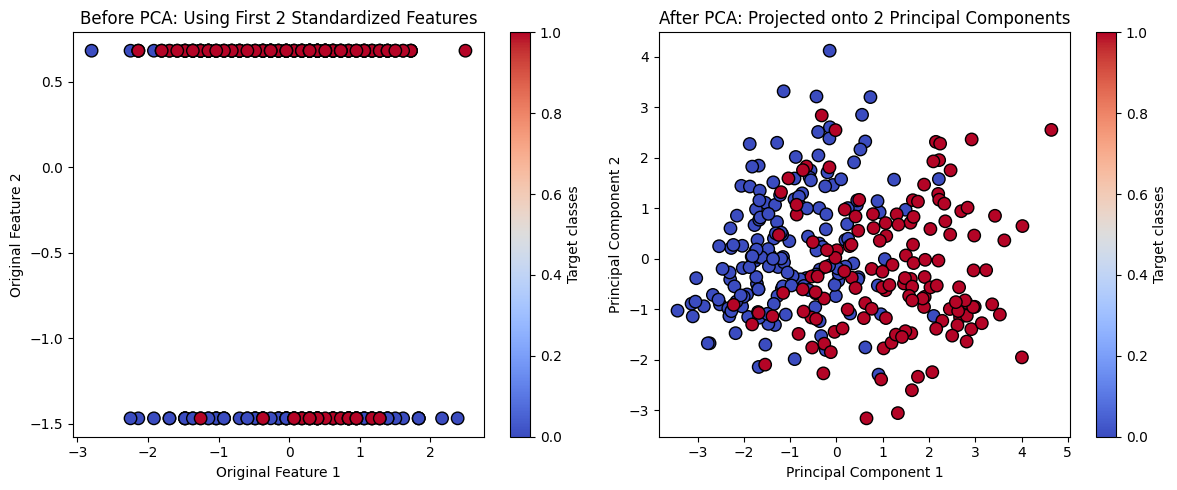

In [7]:
X_std_np = np.array(standardized_data)

# Project data onto top 2 eigenvectors
X_pca = X_std_np.dot(eigenvectors[:, :2])

target_aligned = target.loc[standardized_data.index]
y_numeric = pd.factorize(target_aligned)[0]

# Plot the results
plt.figure(figsize=(12, 5))

# first plot
plt.subplot(1, 2, 1)
plt.scatter(X_std_np[:, 0], X_std_np[:, 1],
            c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel("Original Feature 1")
plt.ylabel("Original Feature 2")
plt.title("Before PCA: Using First 2 Standardized Features")
plt.colorbar(label="Target classes")

# second plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("After PCA: Projected onto 2 Principal Components")
plt.colorbar(label="Target classes")

plt.tight_layout()
plt.show()